In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/apr_1-5.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-01,1245325096601833473,@ZyppApp Corona Update in India!\n\nTotal Conf...,[],0.0,{'country_code': 'in'},corona update india ! total confirmed active c...,1
1,2020-04-01,1245336297369198598,📢 Announcement\nIn view of the current situati...,['COVID19'],93.0,{'country_code': 'in'},announcement view current situation due covid ...,1
2,2020-04-01,1245336323407220737,All 110 new #Covid19 cases in Tamil Nadu today...,"['Covid19', 'TablighiJamaat']",3793.0,{'country_code': 'in'},new covid cases tamil nadu today persons atten...,0
3,2020-04-01,1245336327979020288,Great gesture. Thank you to IFFCO. #IndiaFigh...,['IndiaFightsCorona'],3323.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",great gesture thank iffco indiafightscorona,1
4,2020-04-01,1245336329409314821,Just In | 110 more cases test positive for #CO...,['COVID19'],89.0,{'country_code': 'in'},cases test positive covid tamil nadu bringing ...,1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(448726, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-01,1245325096601833473,@ZyppApp Corona Update in India!\n\nTotal Conf...,[],0.0,{'country_code': 'in'},corona update india ! total confirmed active c...,1
1,2020-04-01,1245336297369198598,📢 Announcement\nIn view of the current situati...,['COVID19'],93.0,{'country_code': 'in'},announcement view current situation due covid ...,1
2,2020-04-01,1245336323407220737,All 110 new #Covid19 cases in Tamil Nadu today...,"['Covid19', 'TablighiJamaat']",3793.0,{'country_code': 'in'},new covid cases tamil nadu today persons atten...,0
3,2020-04-01,1245336327979020288,Great gesture. Thank you to IFFCO. #IndiaFigh...,['IndiaFightsCorona'],3323.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",great gesture thank iffco indiafightscorona,1
4,2020-04-01,1245336329409314821,Just In | 110 more cases test positive for #CO...,['COVID19'],89.0,{'country_code': 'in'},cases test positive covid tamil nadu bringing ...,1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
448721,2020-04-05,1246704481980432387,Birthday in Corona time😂😂 https://t.co/tuoBQUVfXw,[],1.0,{'country_code': 'in'},birthday corona time,1
448722,2020-04-05,1246807024676925441,Par Corona ke virus se jarur hota hai . Khud k...,[],2.0,{'country_code': 'in'},par corona ke virus se jarur hota hai khud ki ...,1
448723,2020-04-05,1246841376337084416,"Peeps were disciplined😌, Apart from some Shout...","['9baje9mintues', 'COVID2019', 'Lockdown', 'In...",0.0,"{'country_code': 'in', 'state': 'Maharashtra'...",peeps disciplined apart shouts claps nothing h...,1
448724,2020-04-05,1246793158358257664,man exactly one year ago on this day my senior...,[],0.0,{'country_code': 'in'},man exactly one year ago day senior sang suno ...,-1
448725,2020-04-05,1246857031065063424,"PM @narendramodi, @Israelipm_ar explore collab...",[],0.0,{'country_code': 'in'},pm ar explore collaborative ways fight covid v...,-1


In [ ]:
print(df.shape)
df.isnull().sum()

(448726, 8)


date             0
id               0
text             0
hashtags         8
retweet_count    8
location         8
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    corona update india  total confirmed active ca...
1    announcement view current situation due covid ...
2    new covid cases tamil nadu today persons atten...
3          great gesture thank iffco indiafightscorona
4    cases test positive covid tamil nadu bringing ...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

448726


'corona update india  total confirmed active cases total recovered total deaths updated get whatsapp'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.511874198913574 secs.


In [ ]:
t_clean[0]

['corona',
 'update',
 'india',
 'total',
 'confirm',
 'active',
 'case',
 'total',
 'recovered',
 'total',
 'death',
 'update',
 'get',
 'whatsapp']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

corona


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

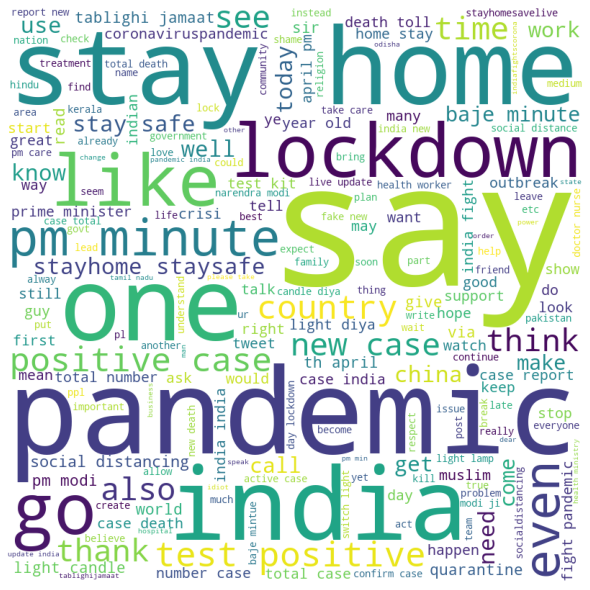

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['corona update india total confirm active case total recovered total death update get whatsapp',
 'announcement view current situation due covid union hrd minister advise promote student study class viii next class grade',
 'new covid case tamil nadu today person attend tablighijamaat delhi nizamuddin last month',
 'great gesture thank iffco indiafightscorona',
 'case test positive covid tamil nadu bring total count']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aarogya setu',
 'aarogya setu app',
 'abuse doctor',
 'across country',
 'across globe',
 'across india',
 'across world',
 'action take',
 'active case',
 'active case total',
 'address nation',
 'admit hospital',
 'air india',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst pandemic',
 'amit shah',
 'andhra pradesh',
 'animal pandemic',
 'animal pandemic please',
 'anti national',
 'antibody test',
 'april fool',
 'april pm',
 'april pm minute',
 'april sunday',
 'april th',
 'around world',
 'arvind kejriwal',
 'asha worker',
 'asharamji bapu',
 'ask people',
 'ask question',
 'attack doctor',
 'attend tablighi',
 'attend tablighi jamaat',
 'aware share',
 'aware share stay',
 'azim premji',
 'back home',
 'baje min',
 'baje mintues',
 'baje minute',
 'baje minute baje',
 'bank approve',
 'bank india',
 'bbc news',
 'bear teach',
 'bear teach civic',
 'beat coronaviruspandemic',
 'beat coronaviruspandemic offering',
 'being must',
 'being must learn'

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:stayhome staysafe,today pm,modi ji,amid lockdown,please help,look like,people india,today pm minute,pandemic please,gon na\nTopic 1:baje minute,tablighi jamaat,let light,india news,hum light,light nahi,hum light nahi,nahi bujhaenge,light nahi bujhaenge,tonight pm\nTopic 2:pm minute,th april,prime minister,social distancing,death toll,switch light,year old,narendra modi,minute pm,namo app\nTopic 3:positive case,light candle,fight pandemic,case report,total number,number case,jai hind,show solidarity,people die,test positive\nTopic 4:stay home,stay safe,home stay,stay home stay,home stay safe,social distance,fight together,let fight,save life,maintain social\nTopic 5:test kit,india fight,pm min,light diyas,light diya,take care,new york,whole world,medical staff,number positive\nTopic 6:test positive,baje mintues,minute baje,live update,health ministry,doctor nurse,day lockdown,due lockdown,relief fund,healthcare worker\nTopic 7:pm modi,april pm,fake news,case india,confirm case,

In [ ]:
lda.perplexity(tf)

617.9202940842382

In [ ]:
f=open('lda_apr_1-5.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_apr_1-5.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_apr_1-5.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_apr_1-5.pk')
shutil.move("topics_apr_1-5.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_apr_1-5.txt')